# Comparing two PyWGCNAs

## Read two PyWGCNA objects

In [1]:
import PyWGCNA
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")
pyWGCNA_3xTgAD = PyWGCNA.readWGCNA("3xTgAD_paper/3xTgAD.p")

Reading WGCNA done!
Reading WGCNA done!


## Comparing two PyWGCNA objects

In [3]:
modelAD_5xFAD_3xTgAD = PyWGCNA.compareWGCNA(pyWGCNA_5xFAD, 
                                           pyWGCNA_3xTgAD)
modelAD_5xFAD_3xTgAD.confusion

,5xFAD,3xTgAD,5xFAD_size,3xTgAD_size,number,fraction(%),P_value
0,brow,brow,417,81,0,0.0,0.649361
1,brow,dark,417,977,52,5.322416,0.0
2,brow,dimg,417,4010,18,0.448878,0.0
3,brow,fire,417,76,1,1.315789,1.0
4,brow,gain,417,166,0,0.0,0.121687
...,...,...,...,...,...,...,...
369,toma,rosy,100,133,3,2.255639,0.016877
370,toma,silv,100,400,0,0.0,0.415373
371,toma,snow,100,144,0,0.0,1.0
372,toma,w,100,156,1,0.641026,0.46988


## Ploting comparison


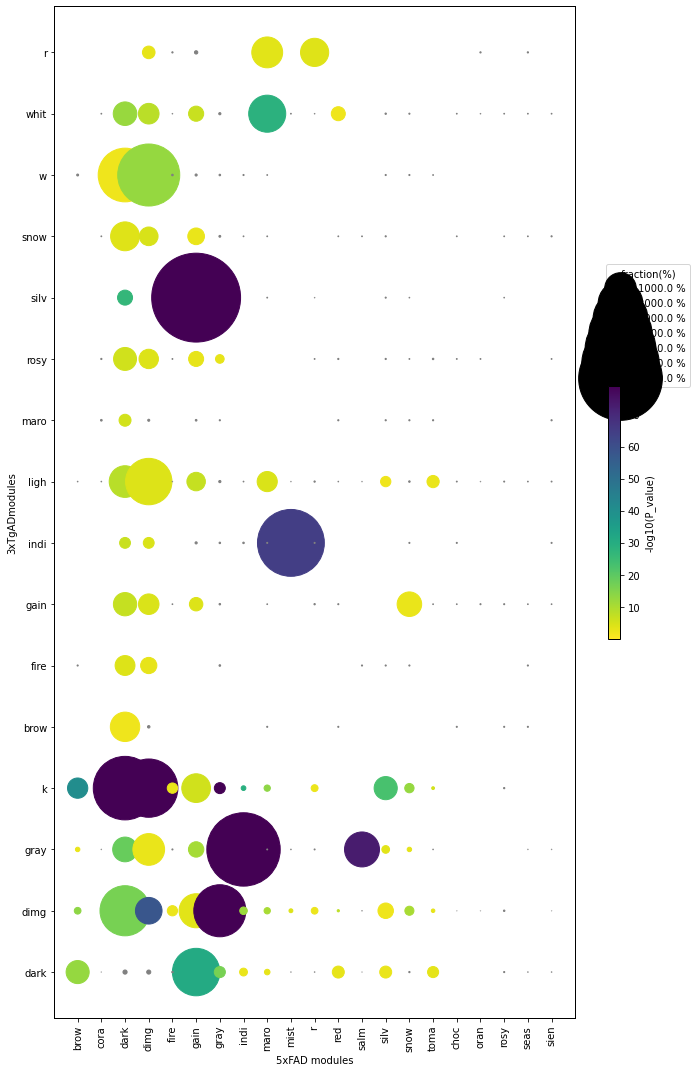

In [5]:
modelAD_5xFAD_3xTgAD.plotCompareWGCA(save=True, order1=None, order2=None)

In [7]:
modelAD_5xFAD_3xTgAD.saveComparison()

In [1]:
import PyWGCNA
modelAD_5xFAD_3xTgAD = PyWGCNA.readComparison('comparison.p')

Reading comparison done!


In [4]:
modelAD_5xFAD_3xTgAD.comparison = modelAD_5xFAD_3xTgAD.confusion